In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

### Load the dataset

In [11]:
data = pd.read_csv(r'C:\Users\Yash Kumar\Documents\homeprices_banglore - Copy.csv')
data.sample(5)

,area,bedrooms,price
6,2732,4,135.0
11,2785,4,140.0
10,1800,3,82.0
15,1175,2,42.0
5,1170,2,38.0


### Scale the data

In [27]:
from sklearn import preprocessing
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()
scaled_x = sx.fit_transform(data.drop('price', axis = 'columns'))
scaled_y = sy.fit_transform(data['price'].values.reshape(data.shape[0], 1))
scaled_x

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [28]:
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [29]:
scaled_y.reshape(20,)

array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
       0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
       0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
       0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ])

###  Implement batch gradient descent

In [30]:
def batch_gradient_descent(x, y_true, epochs, learning_rate = 0.01):
    
    number_of_features = x.shape[1]
    # number of features = 2(area, bedroom)
    w = np.ones(shape = (number_of_features))
    b = 0
    total_samples = x.shape[0] # number of rows in x
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        y_predicted = np.dot(w, x.T) + b
        
        w_grad = -(2/total_samples)*(x.T.dot(y_true - y_predicted))
        b_grad = -(2/total_samples)*np.sum(y_true - y_predicted)
        
        w = w - learning_rate*w_grad
        b = b - learning_rate*b_grad
        
        cost = np.mean(np.square(y_true - y_predicted)) ## Mean Squared Error
        
        if i%10 == 0:
            cost_list.append(cost)
            epoch_list.append(i)
            
    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_x, scaled_y.reshape(scaled_y.shape[0],), 500)
w, b, cost

(array([0.70712464, 0.67456527]), -0.23034857438407422, 0.0068641890429808105)

### plot epoch vs cost graph to see how cost reduces as number of epoch increases

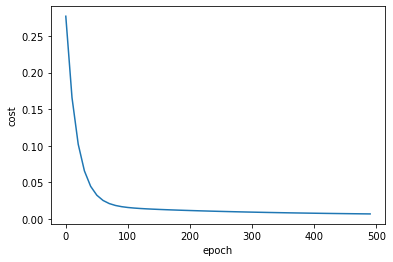

In [31]:
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_list, cost_list)

### Predictions

In [32]:
def predict(area, bedrooms, w, b):
    scaled_x = sx.transform([[area, bedrooms]])[0]
    # here w1 = w[0], w2 = w[1], w3 = w[2] and bias b
    # equation for price is w1*area + w2*bedrooms + w3*age + bias
    # scaled_x[0] is area
    # scaled x[1] is bedrooms
    # scaled x[2] is age
    scaled_price = w[0]*scaled_x[0] + w[1]*scaled_x[1] + b
    
    return sy.inverse_transform([[scaled_price]])[0][0]


predict(2600,4, w, b)

128.45484403267596

In [33]:
predict(2250,3,w,b)

94.16701133317747

In [34]:
predict(3300,4,w,b)

151.49735394363776

In [36]:
import random
random.randint(0,6)

4

### Stochestic Gradient Descent

In [39]:
def stochastic_gradient_descent(x, y_true, epochs, learning_rate = 0.01):
 
    number_of_features = x.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 3 (area, bedroom and age)
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = x.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):    
        random_index = random.randint(0,total_samples-1) # random index from total samples
        sample_x = x[random_index]
        sample_y = y_true[random_index]
        
        y_predicted = np.dot(w, sample_x.T) + b
    
        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*(sample_y-y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.square(sample_y-y_predicted)
        
        if i%100==0: # at every 100th iteration record the cost and epoch value
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_x,scaled_y.reshape(scaled_y.shape[0],),10000)
w_sgd, b_sgd, cost_sgd

(array([0.70517663, 0.67374132]), -0.23075636566633853, 0.004454732770493201)

In [40]:
w,b


(array([0.70712464, 0.67456527]), -0.23034857438407422)

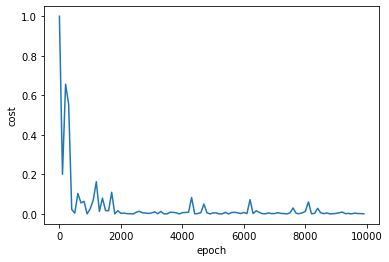

In [41]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd,cost_list_sgd)

In [42]:
predict(2600,4,w_sgd, b_sgd)

128.15313743590835

In [43]:
predict(1000,2,w_sgd, b_sgd)

30.15209770257654

In [44]:
predict(1500,3,w_sgd, b_sgd)

69.30446116967562